In [50]:
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
stock_name = input('What is your stock ticker?').upper()
start = dt.datetime.strptime(input("Enter your start date!"), "%Y,%m,%d")
end = input("Enter your start date!").upper()
index_name = 'SPY'
if end == 'TODAY':
    end = dt.datetime.today()
else:
    end = dt.datetime.strptime(end, "%Y,%m,%d")

my_stock = yf.download(stock_name, start=start, end=end)
index = yf.download(index_name, start=start, end=end)

my_price_change = (my_stock.iloc[-1, 3] - my_stock.iloc[0, 0]) / my_stock.iloc[0, 0]
index_price_change = (index.iloc[-1, 3] - index.iloc[0, 0]) / index.iloc[0, 0]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
my_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-19 00:00:00-05:00,233.779999,235.520004,230.679993,231.929993,231.929993,28623000
2023-01-20 00:00:00-05:00,234.860001,240.740005,234.509995,240.220001,240.220001,35323400
2023-01-23 00:00:00-05:00,241.100006,245.169998,239.649994,242.580002,242.580002,31934000
2023-01-24 00:00:00-05:00,242.500000,243.949997,240.440002,242.039993,242.039993,40234400
2023-01-25 00:00:00-05:00,234.479996,243.270004,230.899994,240.610001,240.610001,66395180


In [36]:
index.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-19 00:00:00-05:00,389.359985,391.079987,387.260010,388.640015,388.640015,86958900
2023-01-20 00:00:00-05:00,390.100006,396.040009,388.380005,395.880005,395.880005,91544900
2023-01-23 00:00:00-05:00,396.720001,402.649994,395.720001,400.630005,400.630005,84178800
2023-01-24 00:00:00-05:00,398.880005,401.149994,397.640015,400.200012,400.200012,59524900
2023-01-25 00:00:00-05:00,395.950012,400.700012,393.559998,400.350006,400.350006,80859486


In [37]:
for i in range(len(my_stock)):
    my_stock['Change'] = ((my_stock['Close'] - my_stock['Open'][0]) / my_stock['Open'][0]) *100
for i in range(len(index)):
    index['Change'] = ((index['Close'] - index['Open'][0]) / index['Open'][0]) *100
index['Change']

Date
2023-01-19 00:00:00-05:00   -0.184911
2023-01-20 00:00:00-05:00    1.674548
2023-01-23 00:00:00-05:00    2.894499
2023-01-24 00:00:00-05:00    2.784063
2023-01-25 00:00:00-05:00    2.822586
Name: Change, dtype: float64

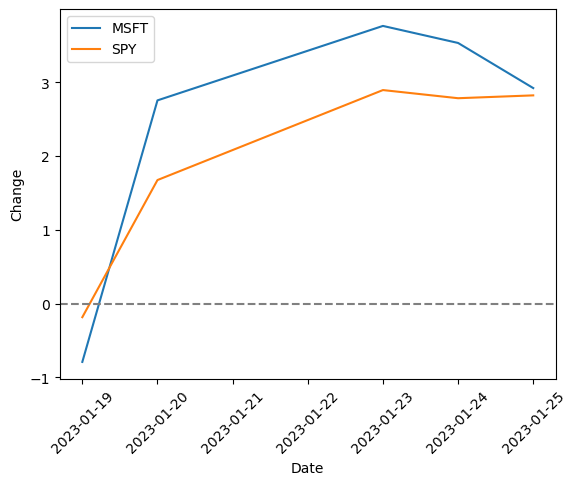

In [44]:
sns.lineplot(x='Date', y='Change', data=my_stock, label=stock_name)
sns.lineplot(x='Date', y='Change', data=index, label=index_name)
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--')
plt.legend()
plt.show()

In [59]:
y_n = input("Do you want look at stock movement in one period of time, I can calculate for you if you type 'y', otherwise type 'n'")
if y_n == 'y':
    start_or_end = input("Type 1 to start from start date, type 2 to start from end date")
    valid_input = False
    if start_or_end == '1':
        start = dt.datetime.strptime(input("Enter your start date!"), "%Y,%m,%d")
        while not valid_input:
            period_format = input("type 'd' for week, type 'w' for week, type 'm' for month, and type 'y' for year!")
            if period_format == 'd':
                unit_period = input("How many days?")
                end = start + relativedelta(days= int(unit_period))
                valid_input = True
            elif period_format == 'w':
                unit_period = input("How many weeks?")
                end = start + relativedelta(weeks= int(unit_period))
                valid_input = True
            elif period_format == 'm':
                unit_period = input("How many months?")
                end = start + relativedelta(months = int(unit_period))
                valid_input = True
            elif period_format == 'y':
                unit_period = input("How many years?")
                end = start + relativedelta(years = int(unit_period))
                valid_input = True
            else:
                print('Please type d, w, m or y!')
    elif start_or_end == '2':
        end = input("Enter your start date!").upper()
        if end == 'TODAY':
            end = dt.datetime.today()
        else:
            end = dt.datetime.strptime(end, "%Y,%m,%d")
        while not valid_input:
            period_format = input("type 'd' for week, type 'w' for week, type 'm' for month, and type 'y' for year!")
            if period_format == 'd':
                unit_period = input("How many days?")
                start = end - relativedelta(days= int(unit_period))
                valid_input = True
            elif period_format == 'w':
                unit_period = input("How many weeks?")
                start = end - relativedelta(weeks= int(unit_period))
                valid_input = True
            elif period_format == 'm':
                unit_period = input("How many months?")
                start = end - relativedelta(months = int(unit_period))
                valid_input = True
            elif period_format == 'y':
                unit_period = input("How many years?")
                start = end - relativedelta(years = int(unit_period))
                valid_input = True
            else:
                print('Please type d, w, m or y!')
else:
    start = dt.datetime.strptime(input("Enter your start date!"), "%Y,%m,%d")
    end = input("Enter your start date!").upper()
    if end == 'TODAY':
        end = dt.datetime.today()
    else:
        end = dt.datetime.strptime(end, "%Y,%m,%d")
print(start, end)

2022-01-25 20:41:19.851644 2023-01-25 20:41:19.851644


In [60]:
index = yf.download("^SPX", start=start, end=end)
index

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-25 00:00:00-05:00,3982.709961,4019.550049,3949.060059,4016.219971,4016.219971,2416510578
